In [1]:
# Define the path to the directory containing images in Google Drive
input_directory = '/content/drive/MyDrive/ScrewAndBolt_20240713'


Processed 20240713_193907.jpg: 163 objects detected.


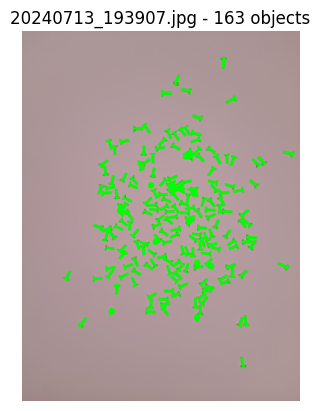

Processed 20240713_193839.jpg: 161 objects detected.


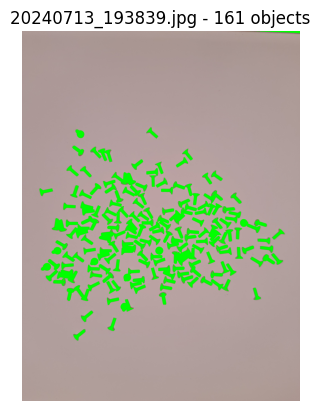

Processed 20240713_193650.jpg: 5 objects detected.


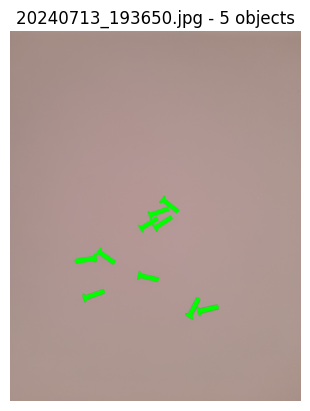

Processed 20240713_193135.jpg: 48 objects detected.


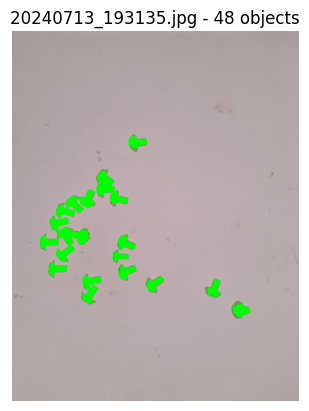

Processed 20240713_192951.jpg: 45 objects detected.


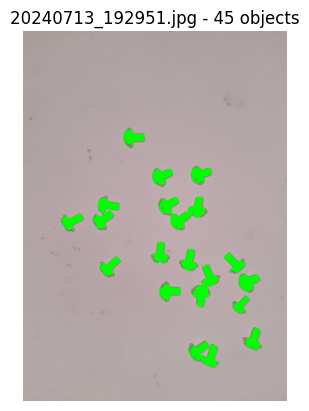

Processed 20240713_193831.jpg: 174 objects detected.


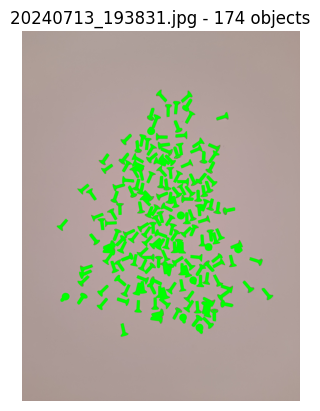

Processed 20240713_193659.jpg: 8 objects detected.


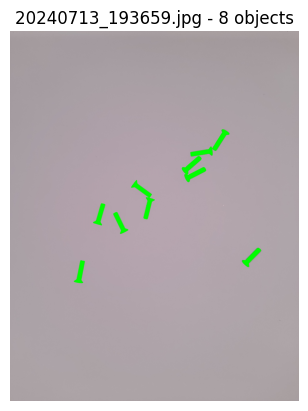

Processed 20240713_194256.jpg: 67 objects detected.


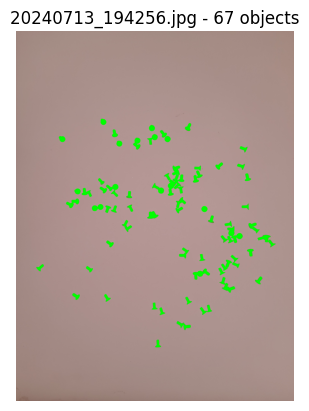

Processed 20240713_194232.jpg: 74 objects detected.


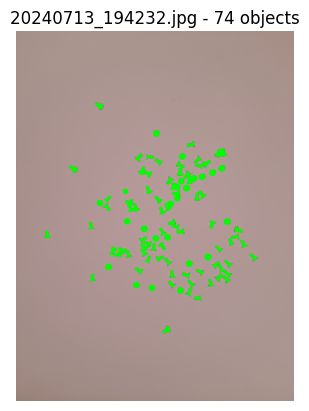

Processed 20240713_194215.jpg: 81 objects detected.


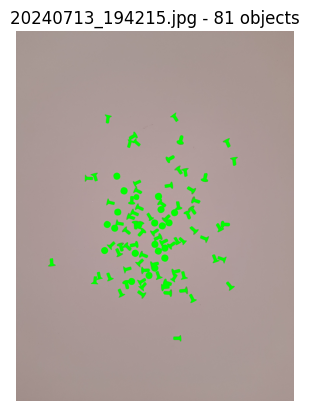

Processed 20240713_194206.jpg: 74 objects detected.


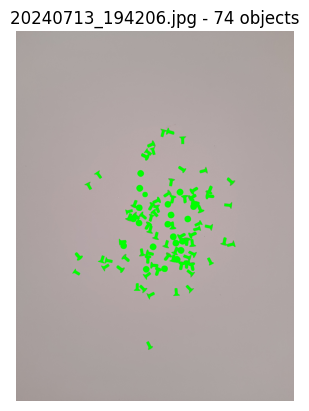

Processed 20240713_194200.jpg: 69 objects detected.


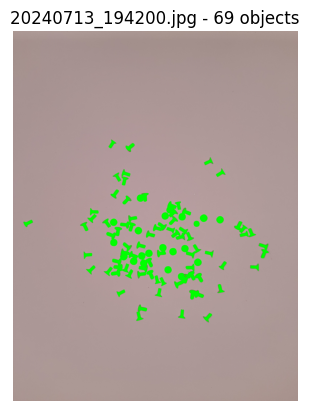

Processed 20240713_194316.jpg: 78 objects detected.


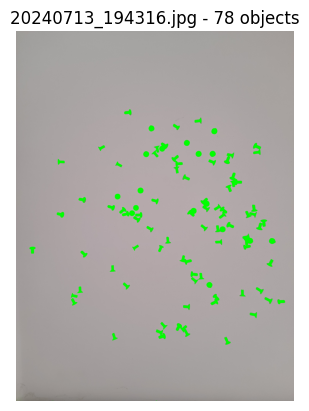

Processed 20240713_194630.jpg: 141 objects detected.


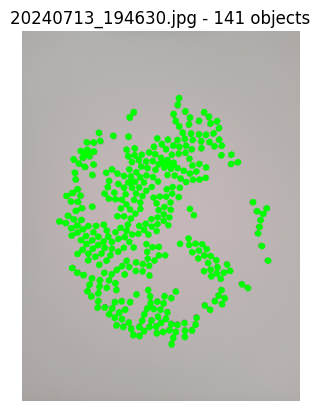

Processed 20240713_194621.jpg: 114 objects detected.


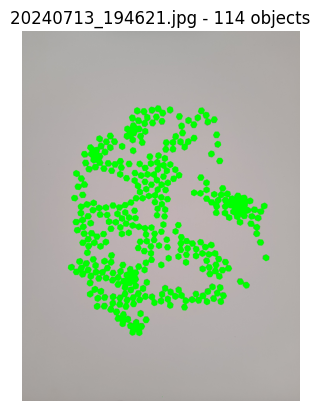

Processed 20240713_194606.jpg: 65 objects detected.


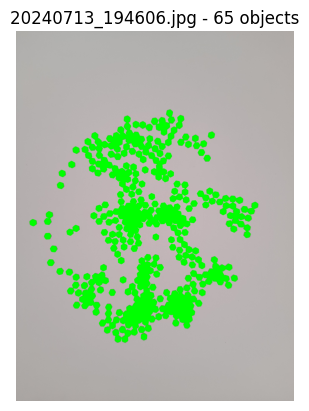

Processed 20240713_194551.jpg: 46 objects detected.


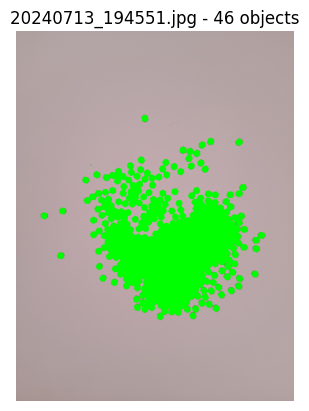

Processed 20240713_194541.jpg: 47 objects detected.


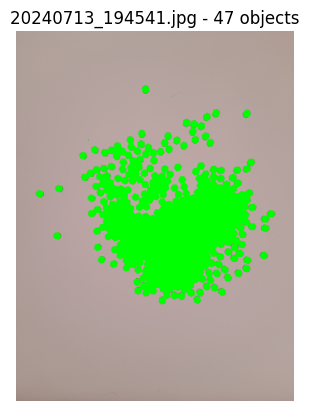

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the path to the directory containing images in Google Drive
input_directory = '/content/drive/MyDrive/ScrewAndBolt_20240713'
output_directory = '/content/drive/MyDrive/masked images'
os.makedirs(output_directory, exist_ok=True)

def process_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Thresholding to get a binary image
    _, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Count objects
    object_count = len(contours)

    # Create a mask image with the same size as the original image
    mask = np.zeros(image.shape[:2], dtype="uint8")

    # Draw the contours on the mask image
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Create an overlay image to display masks on original
    overlay = image.copy()
    overlay[mask == 255] = (0, 255, 0)  # Overlay mask in green

    return object_count, mask, overlay

# Process each image in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(input_directory, filename)
        object_count, mask, overlay = process_image(image_path)

        # Save the mask and overlay
        mask_path = os.path.join(output_directory, f"mask_{filename}")
        overlay_path = os.path.join(output_directory, f"overlay_{filename}")
        cv2.imwrite(mask_path, mask)
        cv2.imwrite(overlay_path, overlay)

        print(f"Processed {filename}: {object_count} objects detected.")

        # Display the overlay
        overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
        plt.imshow(overlay_rgb)
        plt.title(f'{filename} - {object_count} objects')
        plt.axis('off')
        plt.show()
